In [54]:
import numpy as np
import glob
from PIL import Image
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import skimage.transform
import skimage.color
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import glob
import code
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import datetime
from PIL import Image
from itertools import chain
import csv
import random
import pickle

import warnings
warnings.filterwarnings('ignore');
plt.style.use('ggplot')
%matplotlib inline

In [52]:
def load_training_data():
    paths = [
        "images/1-Acrocarpus fraxinifolius/*",
        "images/2-Araucaria angustifolia/*",
        "images/3-Aspidosperma polyneuron/*",
        "images/4-Aspidosperma sp/*",
        "images/5-Bagassa guianensis/*",
        "images/6-Balfourodendron riedelianum/*",
        "images/7-Bertholletia excelsa/*",
        "images/8-Bowdichia sp/*",
        "images/9-Brosimum parinarioides/*",
        "images/10-Carapa guianensis/*",
        "images/11-Cariniana estrellensis/*",
        "images/12-Cedrela fissilis/*",
        "images/13-Cedrelinga cateniformis/*",
        "images/14-Cordia goeldiana/*",
        "images/15-Couratari sp/*",
        "images/16-Dipteryx sp/*",
        "images/17-Erisma uncinatum/*",
        "images/18-Eucalyptus sp/*",
        "images/19-Eugenia pyriformis/*",
        "images/20-Euxylophora paraensis/*",
        "images/21-Goupia glabra/*",
        "images/22-Grevillea robusta/*",
        "images/23-Handroanthus sp/*",
        "images/24-Hymenaea sp/*",
        "images/25-Hymenolobium petraeum/*",
        "images/26-Hymenolobium sp/*",
        "images/27-Inga vera/*",
        "images/28-Laurus nobilis/*",
        "images/29-Machaerium paraguariense/*",
        "images/30-Machaerium sp/*",
        "images/31-Manilkara elata/*",
        "images/32-Melia azedarach/*",
        "images/33-Mezilaurus itauba/*",
        "images/34-Micropholis venulosa/*",
        "images/35-Mimosa scabrella/*",
        "images/36-Muellera campestris/*",
        "images/37-Myroxylon balsamum/*",
        "images/38-Nectandra megapotamica/*",
        "images/39-Ocotea indecora/*",
        "images/40-Ocotea porosa/*",
        "images/41-Peltogyne sp/*",
        "images/42-Pinus sp/*",
        "images/43-Pouteria pachycarpa/*",
        "images/44-Simarouba amara/*",
        "images/45-Swietenia macrophylla/*",
        "images/46-Vochysia sp/*",           
                
    ]
    labels = []
    image_paths = []
    for path in paths:
        for im_path in glob.glob(path):
            if path == "images/1-Acrocarpus fraxinifolius/*":
                labels.append("Acrocarpus-fraxinifolius")
            if path == "images/2-Araucaria angustifolia/*":
                labels.append("Araucaria angustifolia")       
            if path == "images/3-Aspidosperma polyneuron/*":
                labels.append("Aspidosperma polyneuron")
            if path == "images/4-Aspidosperma sp/*":
                labels.append("Aspidosperma sp")
            if path == "images/5-Bagassa guianensis/*":
                labels.append("Bagassa guianensis")
            if path == "images/6-Balfourodendron riedelianum/*":
                labels.append("Balfourodendron riedelianum")
            if path == "images/7-Bertholletia excelsa/*":
                labels.append("Bertholletia excelsa")    
            if path == "images/8-Bowdichia sp/*":
                labels.append("Bowdichia sp")
            if path == "images/9-Brosimum parinarioides/*":
                labels.append("Brosimum parinarioides")
            if path == "images/10-Carapa guianensis/*":
                labels.append("Carapa guianensis")  
            if path == "images/11-Cariniana estrellensis/*":
                labels.append("Cariniana estrellensis")
            if path == "images/12-Cedrela fissilis/*":
                labels.append("Cedrela fissilis")
            if path == "images/13-Cedrelinga cateniformis/*":
                labels.append("Cedrelinga cateniformis")
            if path == "images/14-Cordia goeldiana/*":
                labels.append("Cordia goeldiana")
            if path == "images/15-Couratari sp/*":
                labels.append("Couratari sp")
            if path == "images/16-Dipteryx sp/*":
                labels.append("Dipteryx sp")
            if path == "images/17-Erisma uncinatum/*":
                labels.append("Erisma uncinatum")
            if path == "images/18-Eucalyptus sp/*":
                labels.append("Eucalyptus sp")
            if path == "images/19-Eugenia pyriformis/*":
                labels.append("Eugenia pyriformis")
            if path == "images/20-Euxylophora paraensis/*":
                labels.append("Euxylophora paraensis")     
            if path == "images/21-Goupia glabra/*":
                labels.append("Goupia glabra")
            if path == "images/22-Grevillea robusta/*":
                labels.append("Grevillea robusta")
            if path == "images/23-Handroanthus sp/*":
                labels.append("Handroanthus sp")
            if path == "images/24-Hymenaea sp/*":
                labels.append("Hymenaea sp")
            if path == "images/25-Hymenolobium petraeum/*":
                labels.append("Hymenolobium petraeum")
            if path == "images/26-Hymenolobium sp/*":
                labels.append("Hymenolobium sp")
            if path == "images/27-Inga vera/*":
                labels.append("Inga vera")
            if path == "images/28-Laurus nobilis/*":
                labels.append("Laurus nobilis")
            if path == "images/29-Machaerium paraguariense/*":
                labels.append("Machaerium paraguariense")
            if path == "images/30-Machaerium sp/*":
                labels.append("Machaerium sp")       
            if path == "images/31-Manilkara elata/*":
                labels.append("Manilkara elata")
            if path == "images/32-Melia azedarach/*":
                labels.append("Melia azedarach")
            if path == "images/33-Mezilaurus itauba/*":
                labels.append("Mezilaurus itauba")
            if path == "images/34-Micropholis venulosa/*":
                labels.append("Micropholis venulosa")
            if path == "images/35-Mimosa scabrella/*":
                labels.append("Mimosa scabrella")
            if path == "images/36-Muellera campestris/*":
                labels.append("Muellera campestris")
            if path == "images/37-Myroxylon balsamum/*":
                labels.append("Myroxylon balsamum")
            if path == "images/38-Nectandra megapotamica/*":
                labels.append("Nectandra megapotamica")
            if path == "images/39-Ocotea indecora/*":
                labels.append("Ocotea indecora")
            if path == "images/40-Ocotea porosa/*":
                labels.append("Ocotea porosa")        
            if path == "images/41-Peltogyne sp/*":
                labels.append("Peltogyne sp")
            if path == "images/42-Pinus sp/*":
                labels.append("Pinus sp")
            if path == "images/43-Pouteria pachycarpa/*":
                labels.append("Pouteria pachycarpa")
            if path == "images/44-Simarouba amara/*":
                labels.append("Simarouba amara")
            if path == "images/45-Swietenia macrophylla/*":
                labels.append("Swietenia macrophylla")
            if path ==  "images/46-Vochysia sp/*":
                labels.append("Vochysia sp")
            image_paths.append(im_path)
    return image_paths, labels

train_paths, train_labels = load_training_data()

In [12]:
print(len(train_paths))
print(len(train_labels))

1901
1901


In [13]:
train_paths[:5]

['images/1-Acrocarpus fraxinifolius\\0101.jpg',
 'images/1-Acrocarpus fraxinifolius\\0102.jpg',
 'images/1-Acrocarpus fraxinifolius\\0103.jpg',
 'images/1-Acrocarpus fraxinifolius\\0104.jpg',
 'images/1-Acrocarpus fraxinifolius\\0105.jpg']

In [14]:
train_labels[:5]

['Acrocarpus-fraxinifolius',
 'Acrocarpus-fraxinifolius',
 'Acrocarpus-fraxinifolius',
 'Acrocarpus-fraxinifolius',
 'Acrocarpus-fraxinifolius']

In [15]:
def get_image_features(image_paths, shape):
    height, width, channels = shape
    array = np.zeros((len(image_paths), height, width, channels))
    for i, path in enumerate(image_paths):
        im = Image.open(path)
        as_array = np.asarray(im)
        if len(as_array.shape) == 2: # convert to 3 channels (required input to VGG)
            as_array = skimage.color.gray2rgb(as_array)
        resized = skimage.transform.resize(as_array, shape)
        array[i,:,:] = resized
        if (i + 1) % 500 == 0:
            print(f'Finished loading {i+1} samples')
    return array

In [16]:
categorical_mapping = { label: i for i, label in enumerate(set(train_labels)) }
categorical_mapping

{'Hymenolobium sp': 0,
 'Euxylophora paraensis': 1,
 'Acrocarpus-fraxinifolius': 2,
 'Handroanthus sp': 3,
 'Pinus sp': 4,
 'Peltogyne sp': 5,
 'Vochysia sp': 6,
 'Bowdichia sp': 7,
 'Araucaria angustifolia': 8,
 'Cedrelinga cateniformis': 9,
 'Aspidosperma polyneuron': 10,
 'Hymenolobium petraeum': 11,
 'Eugenia pyriformis': 12,
 'Mimosa scabrella': 13,
 'Ocotea indecora': 14,
 'Bertholletia excelsa': 15,
 'Brosimum parinarioides': 16,
 'Cariniana estrellensis': 17,
 'Ocotea porosa': 18,
 'Machaerium paraguariense': 19,
 'Eucalyptus sp': 20,
 'Bagassa guianensis': 21,
 'Nectandra megapotamica': 22,
 'Muellera campestris': 23,
 'Micropholis venulosa': 24,
 'Simarouba amara': 25,
 'Aspidosperma sp': 26,
 'Grevillea robusta': 27,
 'Dipteryx sp': 28,
 'Inga vera': 29,
 'Manilkara elata': 30,
 'Swietenia macrophylla': 31,
 'Myroxylon balsamum': 32,
 'Goupia glabra': 33,
 'Cedrela fissilis': 34,
 'Laurus nobilis': 35,
 'Hymenaea sp': 36,
 'Pouteria pachycarpa': 37,
 'Cordia goeldiana': 38,


In [17]:
def labels_to_np_array(labels, mapping):
    return np.array([mapping[label] for label in labels])

In [18]:
IMAGE_SHAPE = (200, 300, 3)

In [19]:
full_training_X = get_image_features(train_paths, IMAGE_SHAPE)
full_training_y = labels_to_np_array(train_labels, categorical_mapping)

Finished loading 500 samples
Finished loading 1000 samples
Finished loading 1500 samples


In [20]:
from sklearn.model_selection import train_test_split
SEED = 32
TEST_SET_SIZE = .2

X_train, X_test, y_train, y_test = train_test_split(
    full_training_X, full_training_y, test_size=TEST_SET_SIZE, random_state=SEED
)

In [63]:
print(X_train.shape)
print(X_test.shape)
full_training_X.shape

(1520, 200, 300, 3)
(381, 200, 300, 3)


(1901, 200, 300, 3)

In [31]:
#(number of images, channels* height* width)
X_train_KNN = X_train.reshape(1520,200*300*3)
X_test_KNN = X_test.reshape(381,200*300*3)

KNN= 2

In [33]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=2)

#Train the model using the training sets
knn.fit(X_train_KNN, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test_KNN)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.18110236220472442


KNN =5

In [34]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train_KNN, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test_KNN)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2178477690288714


KNN =10

In [35]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10)

#Train the model using the training sets
knn.fit(X_train_KNN, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test_KNN)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2047244094488189


Conclusion:
    KNN is not suitable for the large dimensional data. In such cases, dimension needs to reduce to improve the performance

In [37]:
from sklearn.externals import joblib

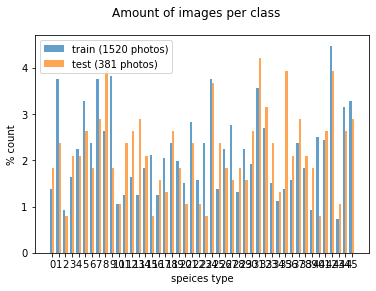

In [43]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
 
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
 
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
 
    xtemp = np.arange(len(unique))
 
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique)
    plt.xlabel('speices type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('Amount of images per class')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)),
    'test ({0} photos)'.format(len(y_test))
]);

## Logistic Regressoion

In [53]:
from sklearn.linear_model import LogisticRegression

#(number of images, channels* height* width)
X_train_lg = X_train.reshape(1520,200*300*3)
X_test_lg = X_test.reshape(381,200*300*3)

logit_clf = LogisticRegression()
logit_clf.fit(X_train_lg, y_train)
y_pred = logit_clf.predict(X_test_lg)
print(classification_report(y_test, y_pred))

C:\Users\sonali\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.89      0.89      0.89         9
           2       0.00      0.00      0.00         3
           3       0.09      0.50      0.15         8
           4       0.14      0.62      0.23         8
           5       1.00      1.00      1.00        10
           6       0.71      0.71      0.71         7
           7       0.89      0.73      0.80        11
           8       0.75      0.40      0.52        15
           9       0.37      1.00      0.54         7
          10       0.67      0.50      0.57         4
          11       1.00      0.11      0.20         9
          12       0.88      0.70      0.78        10
          13       1.00      0.09      0.17        11
          14       0.29      0.25      0.27         8
          15       0.00      0.00      0.00         3
          16       0.30      0.50      0.37         6
          17       0.33    

C:\Users\sonali\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM

In [64]:
#Import svm model
from sklearn import svm

#(number of images, channels* height* width)
X_train_svm = X_train.reshape(1520,200*300*3)
X_test_svm = X_test.reshape(381,200*300*3)

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_svm, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_svm)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='micro'))

#f1_score(y_true, y_pred, ) 
# 0.26666666666666666

#f1_score(y_true, y_pred, average='micro')
# 0.33333333333333331

#f1_score(y_true, y_pred, average='weighted') 

Accuracy: 0.6194225721784777
Precision: 0.5533814797631211
Recall: 0.6194225721784777


for the optimal perforamce we need to have input feature of same value so standardScaler, reduce the dimension for the better perforamce by PCA, logistic regression for the linear classifeir using pipeline

In [56]:
#(number of images, channels* height* width)
X_train_kf = X_train.reshape(1520,200*300*3)
X_test_kf = X_test.reshape(381,200*300*3)


pipe_logreg = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1, 
                                           C=100.0))

pipe_logreg.fit(X_train_kf, y_train)
y_pred = pipe_logreg.predict(X_test_kf)
print('Test Accuracy: {}' .format(pipe_logreg.score(X_train_kf, y_train)))

Test Accuracy: 0.3381578947368421


## Kfold cross validation  
training dataset is split in to 20 folds from that 19 folds are used in the model training and 1 is used to evaluate the preformace of the model

In [57]:
kfold = StratifiedKFold(n_splits=20,random_state=1).split(X_train_kf, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_logreg.fit(X_train_kf[train], y_train[train])
    score = pipe_logreg.score(X_train_kf[test], y_train[test])
    scores.append(score)
    print('Fold:{}, Accuracy:{}'.format(k+1, score))

Fold:1, Accuracy:0.3157894736842105
Fold:2, Accuracy:0.3157894736842105
Fold:3, Accuracy:0.34210526315789475
Fold:4, Accuracy:0.3815789473684211
Fold:5, Accuracy:0.3815789473684211
Fold:6, Accuracy:0.2894736842105263
Fold:7, Accuracy:0.3157894736842105
Fold:8, Accuracy:0.3815789473684211
Fold:9, Accuracy:0.34210526315789475
Fold:10, Accuracy:0.3157894736842105
Fold:11, Accuracy:0.3684210526315789
Fold:12, Accuracy:0.39473684210526316
Fold:13, Accuracy:0.3815789473684211
Fold:14, Accuracy:0.2894736842105263
Fold:15, Accuracy:0.34210526315789475
Fold:16, Accuracy:0.34210526315789475
Fold:17, Accuracy:0.2894736842105263
Fold:18, Accuracy:0.3026315789473684
Fold:19, Accuracy:0.3157894736842105
Fold:20, Accuracy:0.34210526315789475


In [58]:
print('Cross validation accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Cross validation accuracy: 0.338 +/- 0.034
